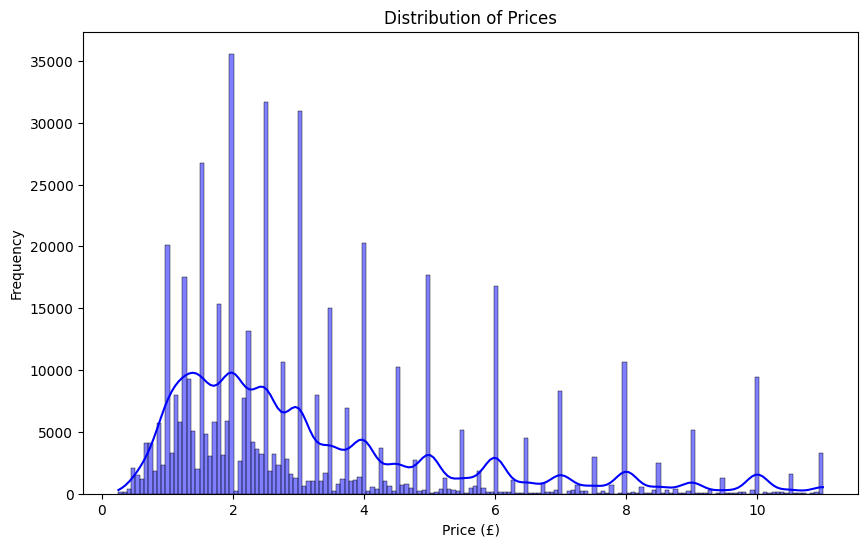

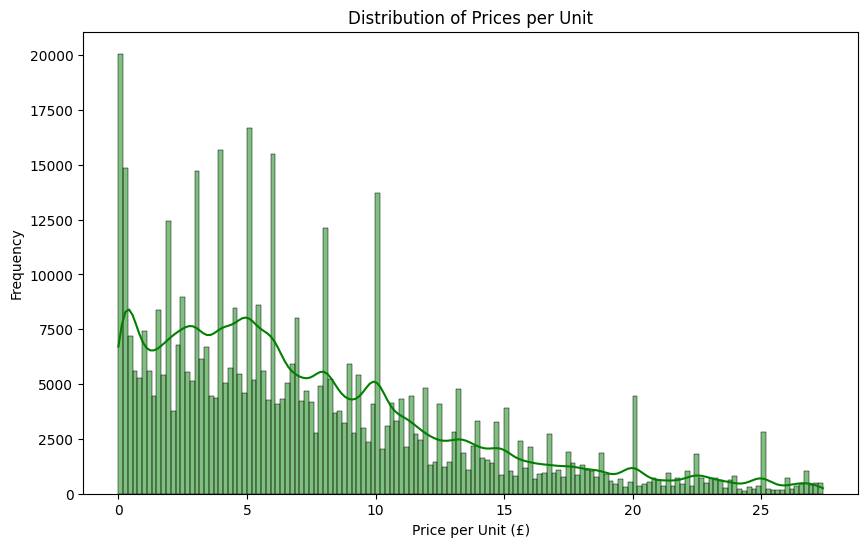

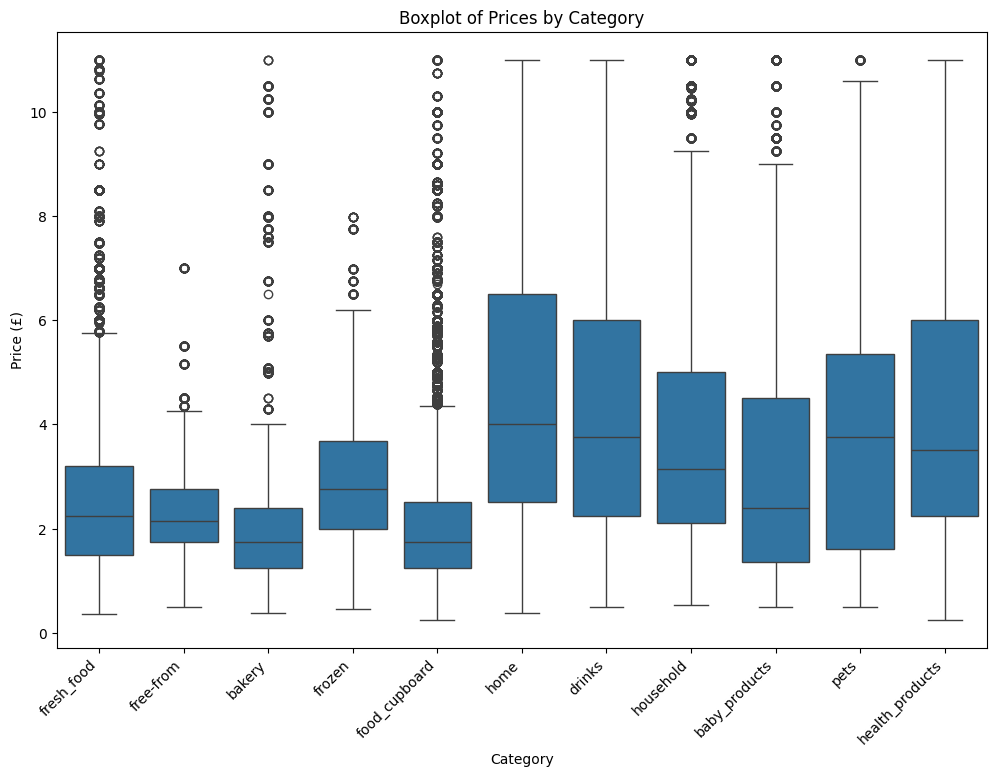

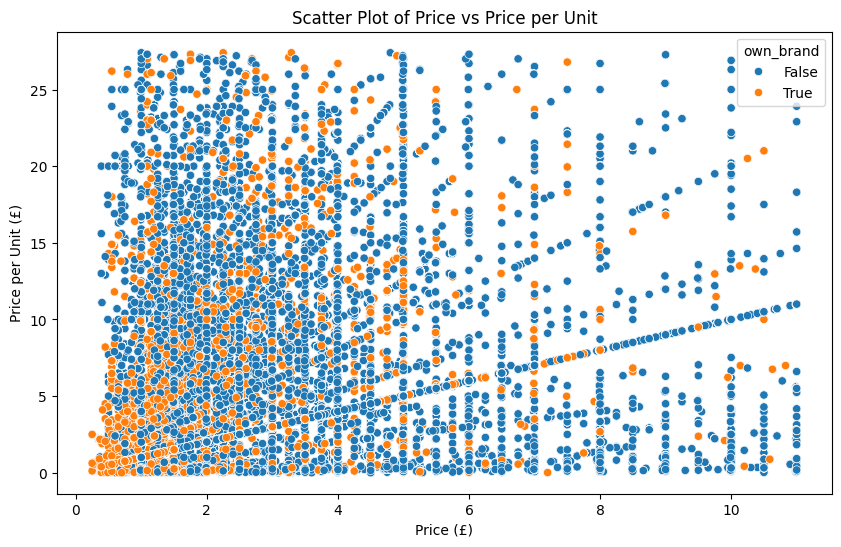

<ipython-input-2-9c4ba60bf3fa>:54: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.drop('date', axis=1).corr()


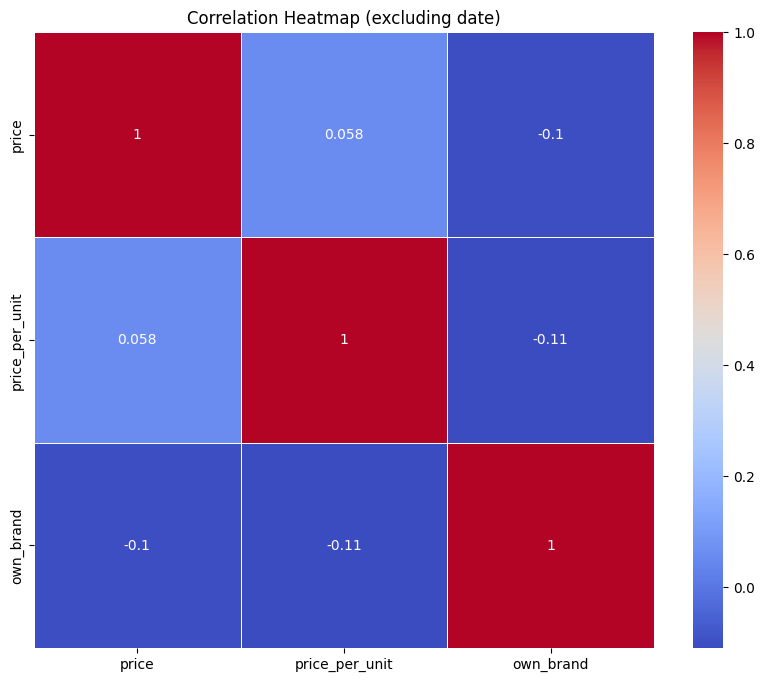

<ipython-input-2-9c4ba60bf3fa>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=data, palette='viridis')


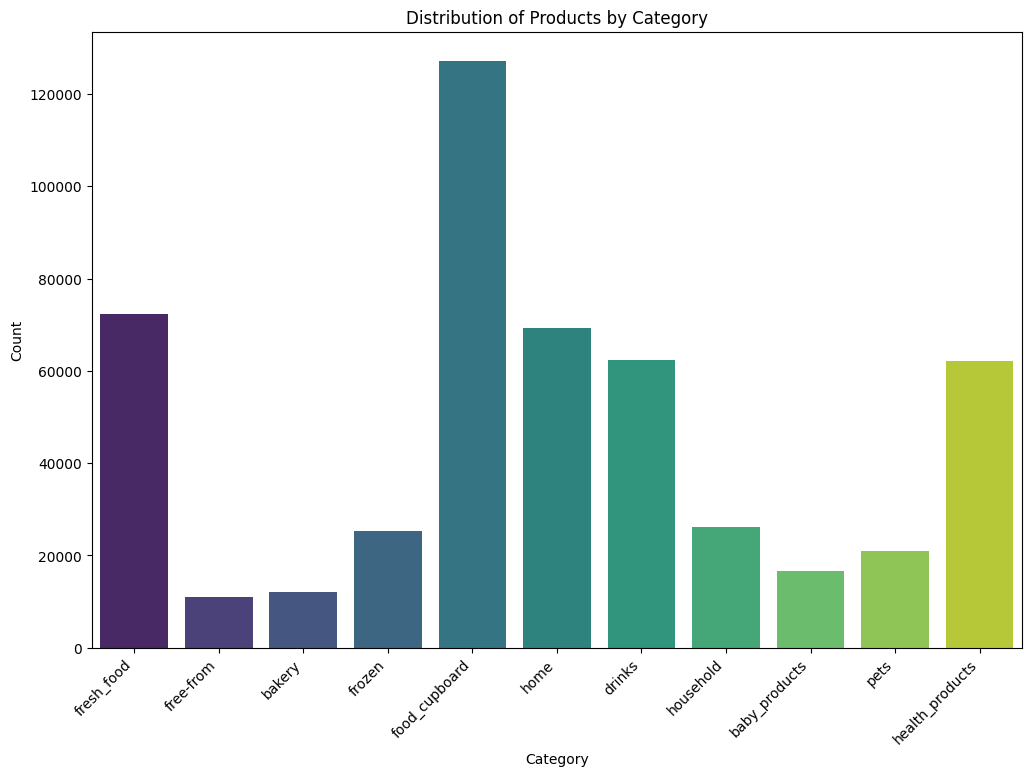

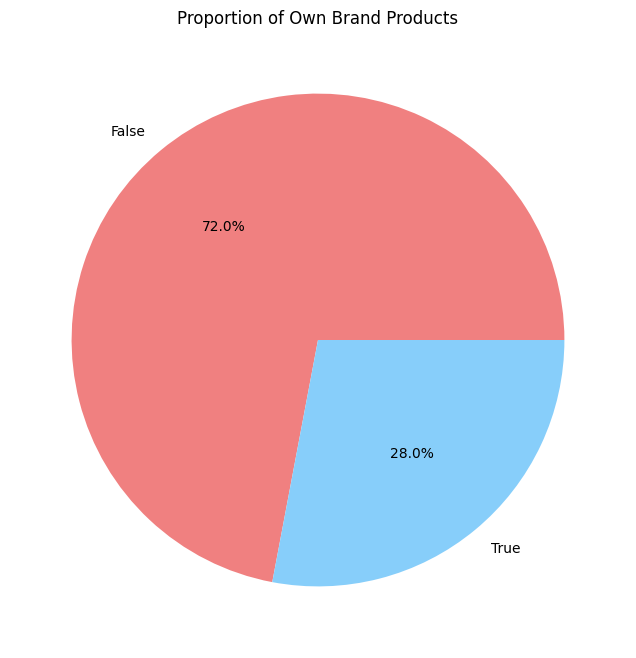

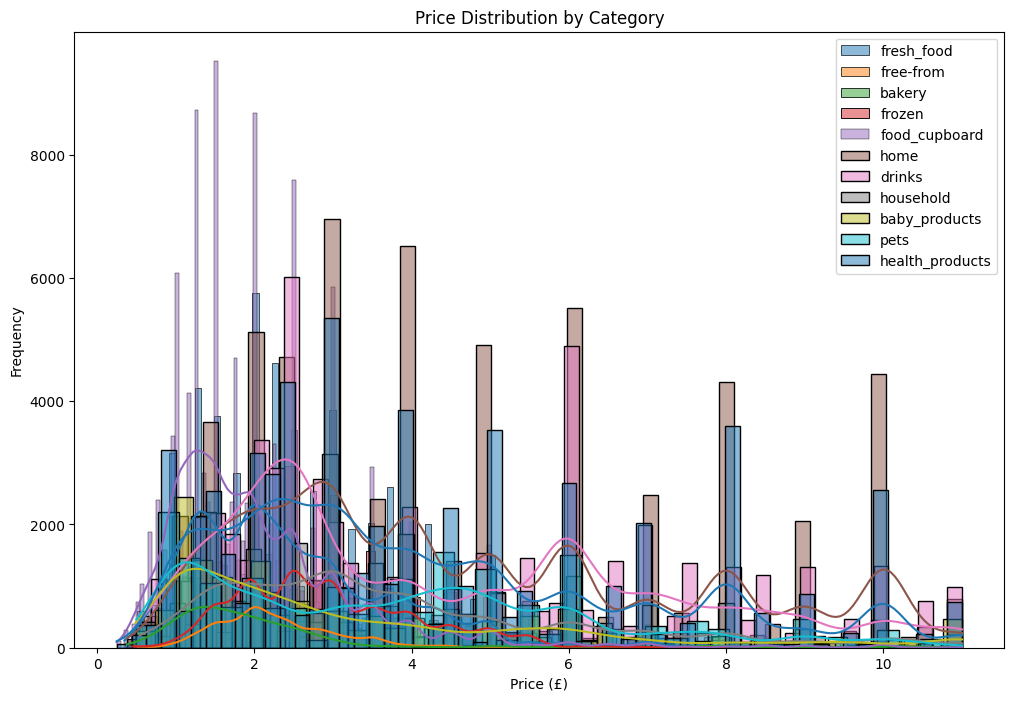

<ipython-input-2-9c4ba60bf3fa>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='supermarket', y='price', data=data, palette='Set3')


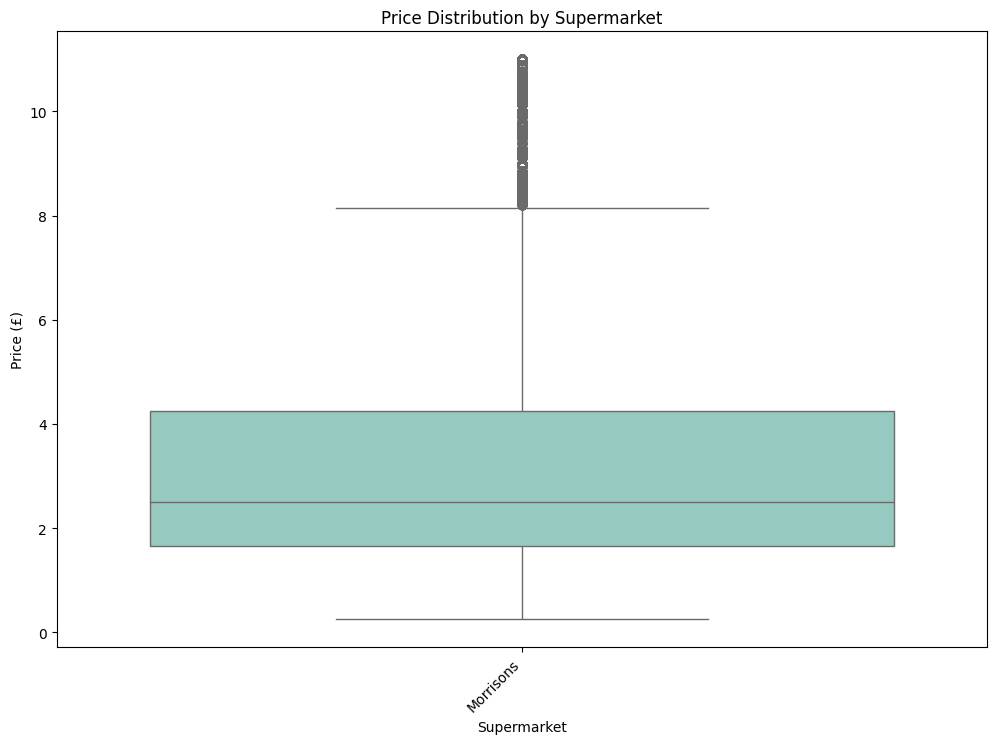

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import kpss, adfuller

data = pd.read_csv('/content/All_Data_Morrisons.csv')
data.columns = ['supermarket', 'price', 'price_per_unit', 'unit', 'product_name', 'date', 'category', 'own_brand']
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data = remove_outliers(data, 'price')
data = remove_outliers(data, 'price_per_unit')

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_unit'], kde=True, color='green')
plt.title('Distribution of Prices per Unit')
plt.xlabel('Price per Unit (£)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price', data=data)
plt.title('Boxplot of Prices by Category')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='price_per_unit', data=data, hue='own_brand')
plt.title('Scatter Plot of Price vs Price per Unit')
plt.xlabel('Price (£)')
plt.ylabel('Price per Unit (£)')
plt.show()

correlation_matrix = data.drop('date', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (excluding date)')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='category', data=data, palette='viridis')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 8))
own_brand_counts = data['own_brand'].value_counts()
plt.pie(own_brand_counts, labels=own_brand_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Own Brand Products')
plt.show()

plt.figure(figsize=(12, 8))
for category in data['category'].unique():
    subset = data[data['category'] == category]
    sns.histplot(subset['price'], kde=True, label=category, alpha=0.5)
plt.title('Price Distribution by Category')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='supermarket', y='price', data=data, palette='Set3')
plt.title('Price Distribution by Supermarket')
plt.xlabel('Supermarket')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.show()

